In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


In [86]:
data = pd.read_csv('matches.csv')
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Top 5 Umpires with the maximum numbers of matches.

In [87]:
# Umpire 1
umpires1_data = pd.DataFrame(data.groupby(['umpire1']).size())
umpires1_data.reset_index(inplace = True)
umpires1_data.columns = ['Umpire','Number of Times']

# Umpire 2
umpires2_data = pd.DataFrame(data.groupby(['umpire2']).size())
umpires2_data.reset_index(inplace = True)
umpires2_data.columns = ['Umpire','Number of Times']

umpires_data = pd.merge(umpires1_data,umpires2_data,on = ['Umpire'],how = 'outer')
umpires_data.head() 

#Required data set

,Umpire,Number of Times_x,Number of Times_y
0,A Deshmukh,3.0,3.0
1,A Nand Kishore,11.0,5.0
2,A Nanda Kishore,1.0,4.0
3,AK Chaudhary,43.0,15.0
4,AM Saheba,3.0,23.0


In [88]:
umpires_data.columns = ['Umpire Name','Count1','Count2']
umpires_data.fillna(0,inplace = True) # Replacing NaN values with 0
umpires_data['Total'] = umpires_data['Count1'] + umpires_data['Count2']
umpires_data.head()

,Umpire Name,Count1,Count2,Total
0,A Deshmukh,3.0,3.0,6.0
1,A Nand Kishore,11.0,5.0,16.0
2,A Nanda Kishore,1.0,4.0,5.0
3,AK Chaudhary,43.0,15.0,58.0
4,AM Saheba,3.0,23.0,26.0


<Figure size 1440x1440 with 0 Axes>

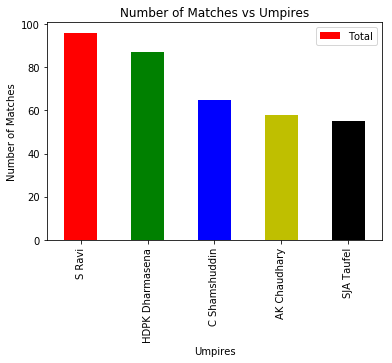

In [93]:
plt.figure(figsize = (20,20))
umpires_data_final = umpires_data[['Umpire Name','Total']]
umpires_data_final = umpires_data_final.sort_values(by = 'Total',ascending = False)
umpires_data_final[0:5].plot(x = 'Umpire Name',kind = 'bar', color = 'rgbyk')
plt.xlabel('Umpires')
plt.ylabel('Number of Matches')
plt.title('Number of Matches vs Umpires')
plt.show()

So S Ravi has umpired in the most number of matches in the IPL till now

Now we will be looking at who has umpired the most matches in each season

In [72]:
# Umpire 1
umpires1_data = pd.DataFrame(data.groupby(['season','umpire1']).size())
umpires1_data.reset_index(inplace = True)
umpires1_data.columns = ['Season','Umpire','Number of Times']

# Umpire 2
umpires2_data = pd.DataFrame(data.groupby(['season','umpire2']).size())
umpires2_data.reset_index(inplace = True)
umpires2_data.columns = ['Season','Umpire','Number of Times']

umpires_data = pd.merge(umpires1_data,umpires2_data,on = ['Season','Umpire'],how = 'outer')
umpires_data.head() 

#Required data set

,Season,Umpire,Number of Times_x,Number of Times_y
0,2008,AV Jayaprakash,2.0,4.0
1,2008,Aleem Dar,5.0,NaN
2,2008,Asad Rauf,10.0,NaN
3,2008,BF Bowden,11.0,NaN
4,2008,BG Jerling,3.0,1.0


In [73]:
umpires_data.columns = ['Season','Umpire Name','Count1','Count2']
umpires_data.fillna(0,inplace = True) # Replacing NaN values with 0
umpires_data['Total'] = umpires_data['Count1'] + umpires_data['Count2']


In [74]:
umpires_data.head() 

,Season,Umpire Name,Count1,Count2,Total
0,2008,AV Jayaprakash,2.0,4.0,6.0
1,2008,Aleem Dar,5.0,0.0,5.0
2,2008,Asad Rauf,10.0,0.0,10.0
3,2008,BF Bowden,11.0,0.0,11.0
4,2008,BG Jerling,3.0,1.0,4.0


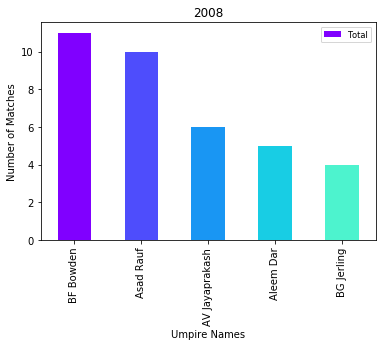

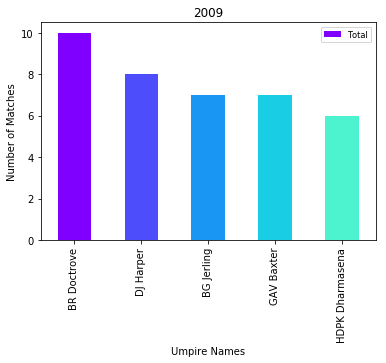

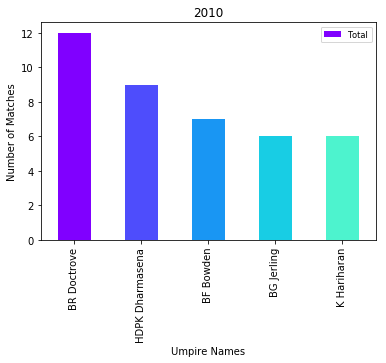

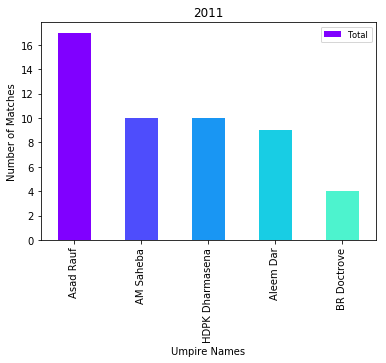

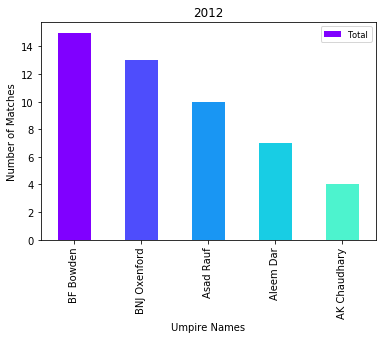

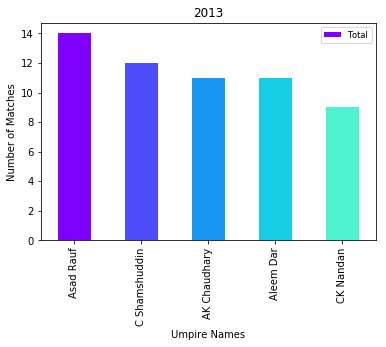

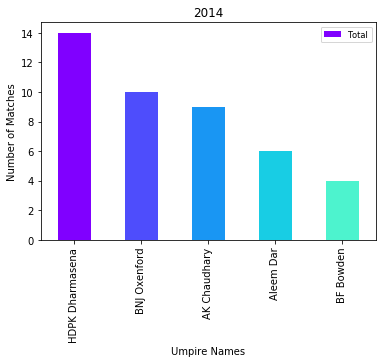

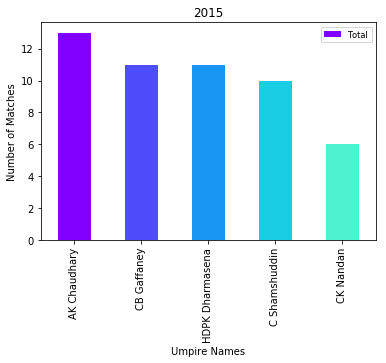

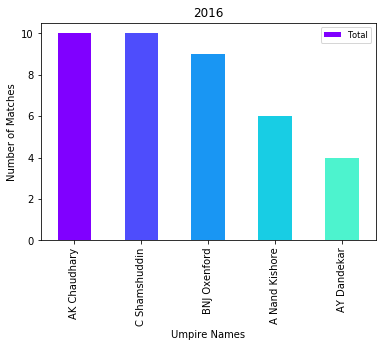

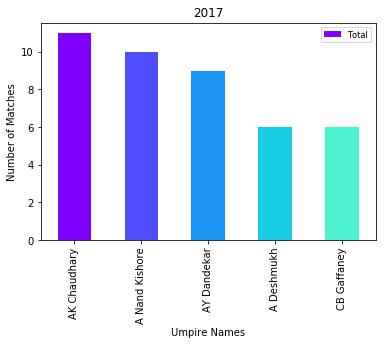

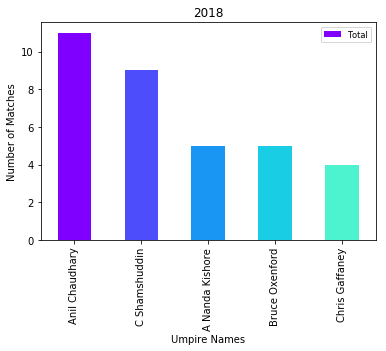

In [84]:
colors = cm.rainbow(np.linspace(0, 1, len(umpires_data['Season'].unique())))
for title, group in umpires_data.groupby('Season'):
    group[0:5].sort_values(by = 'Total',ascending = False).plot(x='Umpire Name', y='Total', title=title,
                                                                kind = 'bar',color = colors)
    plt.legend(loc=1, fontsize = 'small')
    plt.xlabel('Umpire Names')
    plt.ylabel('Number of Matches')
    plt.show()

In [ ]:
This figures shows the top 5 umpires for each season. 